In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-notebook')
import mlflow
import pandas as pd

from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI="http://192.168.1.154:5001/"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

import numpy as np

from ipywidgets import interact

In [1]:
from mlflow.entities import ViewType
names = []
experiments = mlflow.list_experiments(view_type=ViewType.ALL)
for exp in experiments:
    names.append(exp.name)

In [2]:
EXPERIMENT_NAME = "/archimedes-ml"

In [4]:
client = MlflowClient()
experiment_id = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

In [5]:
# Fetch experiment metadata information
experiment = client.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

Name: /archimedes-ml
Experiment_id: 14
Artifact Location: gs://mlflow-arts/14
Tags: {}
Lifecycle_stage: active


In [6]:
status = "FINISHED"
problem = "label"
table_name = "radius_20220918"

runs = mlflow.search_runs(
    experiment_names=[EXPERIMENT_NAME],
    #experiment_ids=[ experiment_id ],
    #filter_string=f"attribute.status='{status}' AND tags.class='{problem}' AND tags.features='{table_name}' AND tags.model={model} AND tags.is_lda={is_lda}",
    output_format="pandas",
)

In [7]:
runs.shape

(512, 134)

In [16]:
usecols = ['tags.is_lda', 'tags.model', 'tags.features', 'tags.class'] + list(runs.columns[['test_accuracy' in column for column in runs.columns]]) + list(runs.columns[['test_precision' in column for column in runs.columns]]) + list(runs.columns[['test_recall' in column for column in runs.columns]])  + list(runs.columns[['test_f1' in column for column in runs.columns]])

df = runs[usecols]
df = df.drop_duplicates().sort_values('tags.model',ascending=False).set_index(["tags.features", "tags.model",'tags.is_lda', "tags.class"]).unstack(-1).unstack(-1)
df

metrics.test_accuracy_score  \
tags.class                                                         label   
tags.is_lda                                                        False   
tags.features                  tags.model                                  
radius_20220918                knn                              0.555556   
                               lda                              0.500000   
                               random_forest                    0.500000   
                               svm                              0.388889   
radius_rolling_20220918        knn                              0.611111   
                               lda                              0.722222   
                               random_forest                    0.611111   
                               svm                              0.388889   
radius_windowing_20220918      knn                              0.816956   
                               lda                              0.631983   
                               random_forest                    0.818524   
                               svm                              0.657434   
radius_windowing__1_20220918   knn                              0.906489   
                               lda                              0.604693   
                               random_forest                    0.921648   
                               svm                              0.645042   
residues_20220918              knn                              0.444444   
                               lda                              0.611111   
                               random_forest                    0.388889   
                               svm                              0.444444   
residues_rolling_20220918      knn                              0.666667   
                               lda                              0.722222   
                               random_forest                    0.666667   
                               svm                              0.555556   
residues_windowing_20220918    knn                              0.874734   
                               lda                              0.672497   
                               random_forest                    0.894079   
                               svm                              0.709407   
residues_windowing__1_20220918 knn                              0.931523   
                               lda                              0.604764   
                               random_forest                    0.937005   
                               svm                              0.712530   

                                                                            \
tags.class                                                 level             
tags.is_lda                                       True     False      True   
tags.features                  tags.model                                    
radius_20220918                knn            0.944444  0.555556  1.000000   
                               lda            0.944444  0.388889  0.944444   
                               random_forest  0.888889  0.555556  0.888889   
                               svm            0.944444  0.611111  0.888889   
radius_rolling_20220918        knn            1.000000  0.611111  1.000000   
                               lda            1.000000  0.444444  1.000000   
                               random_forest  1.000000  0.555556  1.000000   
                               svm            0.944444  0.722222  0.944444   
radius_windowing_20220918      knn            0.591424  0.789696  0.645628   
                               lda            0.631727  0.620539  0.620735   
                               random_forest  0.565822  0.803567  0.629947   
                               svm            0.639386  0.627610  0.634049   
radius_windowing__1_20220918   knn            0.583784  0.88

In [12]:
model='knn'
features = 'radius_windowing_20220918'
df[(df['tags.model'] == model) & (df['tags.features'] =='residues_windowing__1_20220918')]

,tags.is_lda,tags.model,tags.features,tags.class,metrics.test_accuracy_score,metrics.test_precision_score,metrics.test_recall_score,metrics.test_f1_score
0,False,knn,residues_windowing__1_20220918,level,0.917367,0.916704,0.917367,0.916620
1,True,knn,residues_windowing__1_20220918,level,0.706893,0.691105,0.706893,0.690571
32,False,knn,residues_windowing__1_20220918,label,0.931523,0.931544,0.931523,0.931239
33,True,knn,residues_windowing__1_20220918,label,0.684091,0.677556,0.684091,0.677160
128,False,knn,residues_windowing__1_20220918,level,0.917367,0.916704,0.917367,0.916620
129,True,knn,residues_windowing__1_20220918,level,0.706893,0.691105,0.706893,0.690571
160,False,knn,residues_windowing__1_20220918,label,0.931523,0.931544,0.931523,0.931239
161,True,knn,residues_windowing__1_20220918,label,0.684091,0.677556,0.684091,0.677160
333,True,knn,residues_windowing__1_20220918,level,0.706893,0.691105,0.706893,0.690571
335,False,knn,residues_windowing__1_20220918,level,0.917367,0.916704,0.917367,0.916620


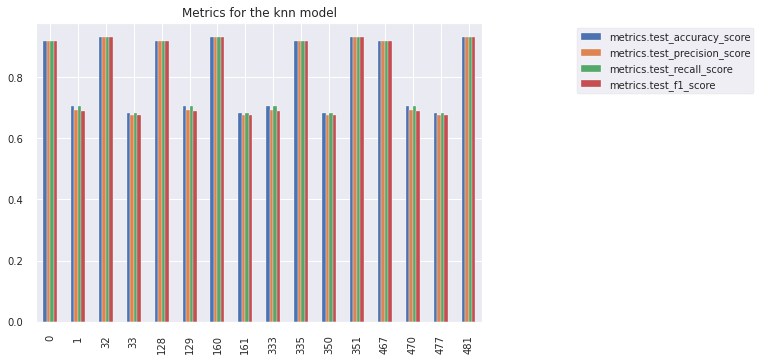

In [13]:
df[(df['tags.model'] == model) & (df['tags.features'] =='residues_windowing__1_20220918')].plot.bar()
plt.title(f"Metrics for the {model} model")
_=plt.legend(bbox_to_anchor=(1.20, 1.))
